# Diabetes 데이터와 Linear Regression

#### 당뇨병 진행도와 관련된 데이터를 이용해 당뇨병 진행을 예측하는 Linear Regression을 학습해 보겠습니다.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

## 1.1 Data Load

#### 데이터는 sklearn.datasets의 load_diabetes함수를 이용해 받을 수 있습니다.

In [51]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

#### 당뇨병 데이터에서 사용되는 변수명은 feature_names 키 값으로 들어 있습니다.
#### 변수명과 변수에 대한 설명은 다음과 같습니다.
* age : 나이
* sex : 성별
* bmi : Body mass index
* bp : Average blood pressure
* 혈청에 대한 6가지 지표들 - s1, s2, s3, s4, s5, s6

In [52]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [53]:
data, target = diabetes['data'], diabetes['target']

In [54]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [55]:
target[0]

151.0

## 1.2 Data EDA

In [56]:
df = pd.DataFrame(data, columns=diabetes['feature_names'])

In [57]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## 1.3 Data Split

#### sklearn.model_selection의 train_test_split함수를 이용해 데이터를 나누겠습니다.

#### train_test_split(
    *arrays,  
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)

* *arrays : 입력은 array로 이루어진 데이터를 받습니다.
* test_size : test로 분할된 사이즈를 정합니다.
* train_size : train으로 분할된 사이즈를 정합니다.
* random_state : 다음에도 같은 값을 얻기 위해서 난수를 고정합니다.
* shuffle : 데이터를 섞을지 말지 결정합니다.
* stratify : 데이터를 나눌 때 정답의 분포를 반영합니다.


In [58]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

train과 test를 7:3의 비율로 나누었습니다.
실제로 잘 나누어졌는지 확인해보겠습니다.

In [59]:
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [60]:
print("train ratio : {:.2f}".format(len(train_data)/len(data)))
print("test ration : {:.2f}".format(len(test_data)/len(data)))

train ratio : 0.70
test ration : 0.30


# 2. Multivariate Regression

## 2.1 학습

In [61]:
from sklearn.linear_model import LinearRegression

multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression()

## 2.2 회귀식 확인

In [62]:
multi_regressor.intercept_

147.71524417759434

In [63]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

## 2.3 예측

In [64]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

## 2.4 평가

#### 평가는 sklearn.metrics의 mean_squared_error를 이용하겠습니다. mean_squared_error는 두 값의 차이의 제곱의 평균을 계산합니다.

In [65]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)

In [66]:
print(f'Multi Regression Train MSE is {multi_train_mse:.4f}')
print(f'Multi Regression Test MSE is {multi_test_mse:.4f}')

Multi Regression Train MSE is 3034.2623
Multi Regression Test MSE is 2562.2750


# 3. Ridge Regression

## 3.1 학습

In [67]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge()

In [68]:
ridge_regressor.intercept_

147.74060119766182

In [69]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

In [70]:
ridge_regressor.coef_

array([  46.89201977,  -55.64009506,  270.71747699,  158.68867814,
         23.59440223,  -11.13019705, -130.05870493,  122.00237806,
        225.92117758,  107.08728777])

## 3.3 예측

In [71]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

## 3.4 평가

In [72]:
ridge_train_mse = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [73]:
print(f"Ridge Regression Train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")

Ridge Regression Train MSE is 3556.1983
Ridge Regression Test MSE is 3200.4051


# 4.LASSO Regression

## 4.1 학습

In [74]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso()

## 4.2 회귀식 확인

In [75]:
lasso_regressor.intercept_

148.13825690433762

In [76]:
lasso_regressor.coef_

array([  0.        ,   0.        , 377.69541767,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       316.05550058,   0.        ])

In [77]:
np.array(diabetes['feature_names'])[lasso_regressor.coef_ != 0]  #선택된 것 확인

array(['bmi', 's5'], dtype='<U3')

## 4.3 예측

In [78]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

In [79]:
## 4.4 평가

In [80]:
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [81]:
print(f"LASSO Regression Train MSE is {lasso_train_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

LASSO Regression Train MSE is 3897.9528
LASSO Regression Test MSE is 3581.6843


# 5. 마무리

## 5.1 평가

In [82]:
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

#multi regression이 가장 예측을 잘했음

Multi Regression Test MSE is 2562.2750
Ridge Regression Test MSE is 3200.4051
LASSO Regression Test MSE is 3581.6843


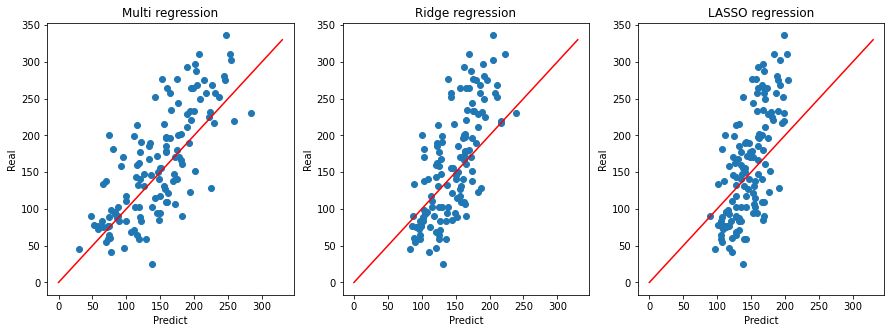

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
preds = [
    ("Multi regression", multi_test_pred),
    ("Ridge regression", ridge_test_pred),
    ("LASSO regression", lasso_test_pred),
]

for idx, (name, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(test_pred, test_target)
    ax.plot(np.linspace(0,330,100), np.linspace(0,330,100), color = 'red')
    ax.set_xlabel('Predict')
    ax.set_ylabel('Real')
    ax.set_title(name)